In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy

In [3]:
from result.ldc_2d_benchmark_P100  import ldc_2d_p100
from result.ldc_2d_benchmark_K2200 import ldc_2d_k2200
from result.ldc_3d_benchmark_P100  import ldc_3d_p100
from result.ldc_3d_benchmark_K2200 import ldc_3d_k2200

In [4]:
ldc_2d_k2200[0]

((32, (16, 1), 'single', True), [15, 16, 16, 16, 16, 16, 16, 16, 16, 16])

In [5]:
ldc_3d_k2200[0]

((16, (16, 1, 1), 'symbolic.D3Q19', 'single', True),
 [58, 60, 60, 60, 60, 60, 60, 60, 59, 60])

In [6]:
def descriptor_subset(data, descriptor):
    return list(
        map(lambda m: (m[0][0:2] + m[0][3:], m[1]),
            filter(lambda m: m[0][2] == descriptor, ldc_3d_p100)))

In [7]:
ldc_3d_D3Q19_p100  = descriptor_subset(ldc_3d_p100,  'symbolic.D3Q19')
ldc_3d_D3Q27_p100  = descriptor_subset(ldc_3d_p100,  'symbolic.D3Q27')
ldc_3d_D3Q19_k2200 = descriptor_subset(ldc_3d_k2200, 'symbolic.D3Q19')
ldc_3d_D3Q27_k2200 = descriptor_subset(ldc_3d_k2200, 'symbolic.D3Q27')

In [8]:
def has(value, options):
    if options == None:
        return True
    else:
        return value in options

def subset(data, size=None, layout=None, precision=None, optimization=None):
    return list(
        filter(lambda m: has(m[0][0], size) and has(m[0][1][0], layout) and has(m[0][2], precision) and has(m[0][3], optimization),
               data))

In [9]:
def mlups_for_size(measurement):
    return (measurement[0][0]**2, numpy.average(measurement[1]))

In [10]:
def scatter(data, **kwargs):
    plt.scatter(*zip(*list(data)), **kwargs)

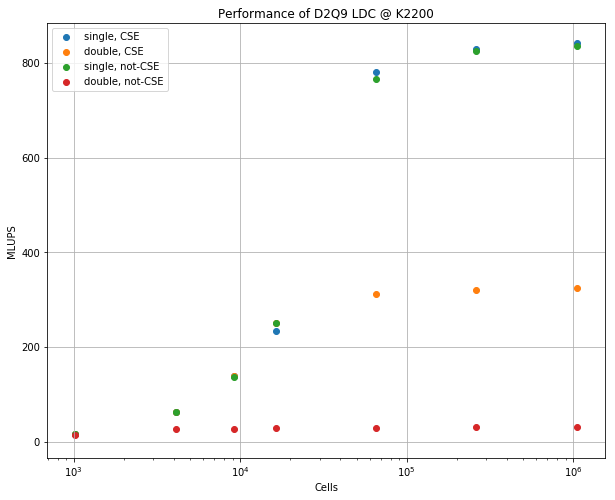

In [11]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Performance of D2Q9 LDC @ K2200')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
scatter(map(mlups_for_size, subset(ldc_2d_k2200, layout=[32], precision=['single'], optimization=[True])), label='single, CSE')
scatter(map(mlups_for_size, subset(ldc_2d_k2200, layout=[32], precision=['double'], optimization=[True])), label='double, CSE')
scatter(map(mlups_for_size, subset(ldc_2d_k2200, layout=[32], precision=['single'], optimization=[False])), label='single, not-CSE')
scatter(map(mlups_for_size, subset(ldc_2d_k2200, layout=[32], precision=['double'], optimization=[False])), label='double, not-CSE')
plt.legend()

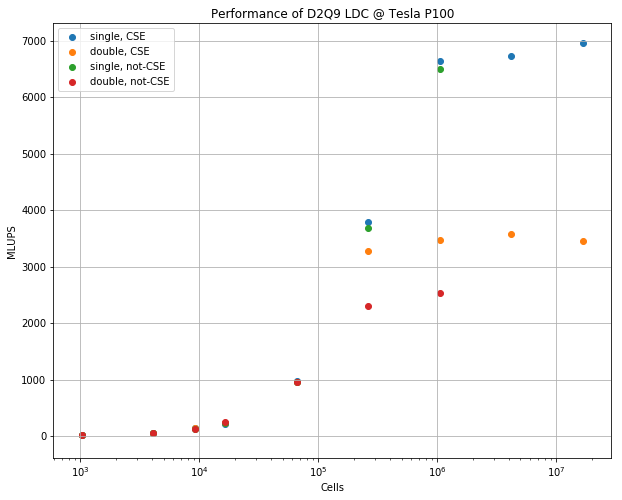

In [12]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Performance of D2Q9 LDC @ Tesla P100')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
scatter(map(mlups_for_size, subset(ldc_2d_p100, layout=[32], precision=['single'], optimization=[True])), label='single, CSE')
scatter(map(mlups_for_size, subset(ldc_2d_p100, layout=[32], precision=['double'], optimization=[True])), label='double, CSE')
scatter(map(mlups_for_size, subset(ldc_2d_p100, layout=[32], precision=['single'], optimization=[False])), label='single, not-CSE')
scatter(map(mlups_for_size, subset(ldc_2d_p100, layout=[32], precision=['double'], optimization=[False])), label='double, not-CSE')
plt.legend()

In [13]:
def mlups_for_size_3d(measurement):
    return (measurement[0][0]**3, numpy.average(measurement[1]))

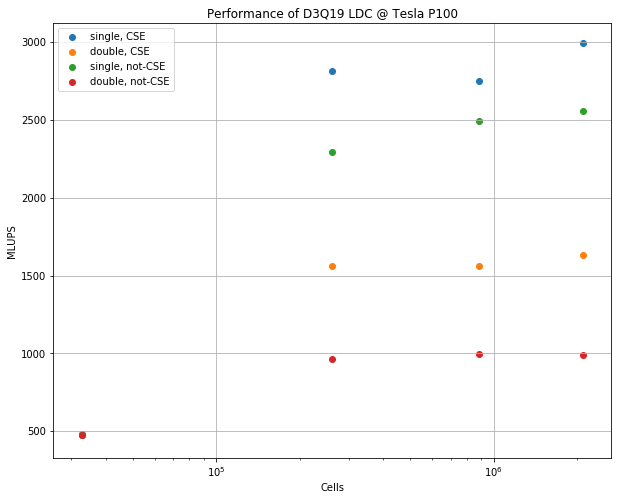

In [14]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Performance of D3Q19 LDC @ Tesla P100')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q19_p100, layout=[32], precision=['single'], optimization=[True])), label='single, CSE')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q19_p100, layout=[32], precision=['double'], optimization=[True])), label='double, CSE')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q19_p100, layout=[32], precision=['single'], optimization=[False])), label='single, not-CSE')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q19_p100, layout=[32], precision=['double'], optimization=[False])), label='double, not-CSE')
plt.legend()

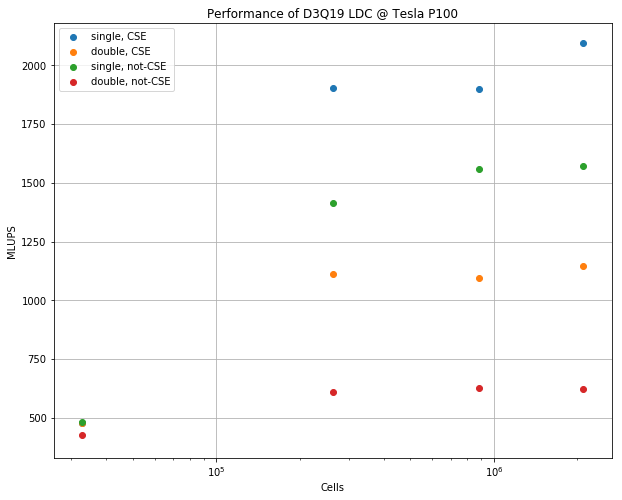

In [15]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Performance of D3Q19 LDC @ Tesla P100')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q27_p100, layout=[32], precision=['single'], optimization=[True])), label='single, CSE')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q27_p100, layout=[32], precision=['double'], optimization=[True])), label='double, CSE')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q27_p100, layout=[32], precision=['single'], optimization=[False])), label='single, not-CSE')
scatter(map(mlups_for_size_3d, subset(ldc_3d_D3Q27_p100, layout=[32], precision=['double'], optimization=[False])), label='double, not-CSE')
plt.legend()

In [16]:
def mlups_for_layout(measurement):
    return (measurement[0][1][0], numpy.average(measurement[1]))

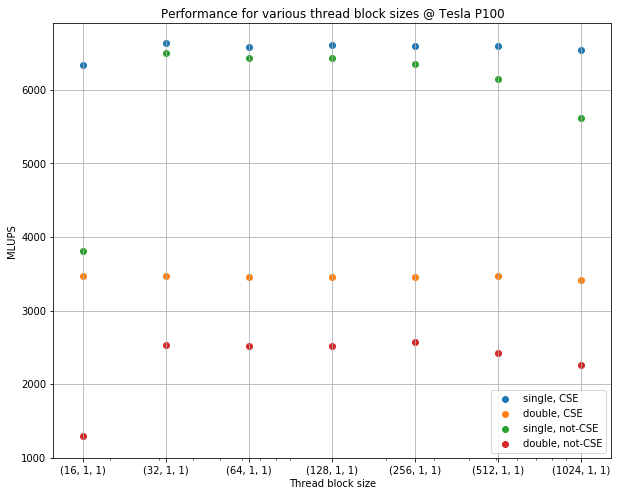

In [17]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Performance for various thread block sizes @ Tesla P100')
plt.xscale('log')
plt.xlabel('Thread block size')
plt.ylabel('MLUPS')
plt.xticks([16,32,64,128,256,512,1024],list(map(lambda x: (x,1,1), [16,32,64,128,256,512,1024])))
scatter(map(mlups_for_layout, subset(ldc_2d_p100, size=[1024], precision=['single'], optimization=[True])), label='single, CSE')
scatter(map(mlups_for_layout, subset(ldc_2d_p100, size=[1024], precision=['double'], optimization=[True])), label='double, CSE')
scatter(map(mlups_for_layout, subset(ldc_2d_p100, size=[1024], precision=['single'], optimization=[False])), label='single, not-CSE')
scatter(map(mlups_for_layout, subset(ldc_2d_p100, size=[1024], precision=['double'], optimization=[False])), label='double, not-CSE')
plt.legend()

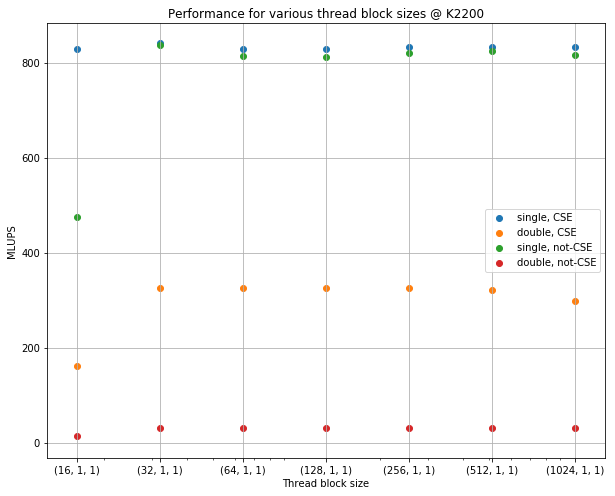

In [18]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Performance for various thread block sizes @ K2200')
plt.xscale('log')
plt.xlabel('Thread block size')
plt.ylabel('MLUPS')
plt.xticks([16,32,64,128,256,512,1024],list(map(lambda x: (x,1,1), [16,32,64,128,256,512,1024])))
scatter(map(mlups_for_layout, subset(ldc_2d_k2200, size=[1024], precision=['single'], optimization=[True])), label='single, CSE')
scatter(map(mlups_for_layout, subset(ldc_2d_k2200, size=[1024], precision=['double'], optimization=[True])), label='double, CSE')
scatter(map(mlups_for_layout, subset(ldc_2d_k2200, size=[1024], precision=['single'], optimization=[False])), label='single, not-CSE')
scatter(map(mlups_for_layout, subset(ldc_2d_k2200, size=[1024], precision=['double'], optimization=[False])), label='double, not-CSE')
plt.legend()

In [19]:
def mlups_spread(data, **kwargs):
    tmp = list(map(lambda m: numpy.average(m[1]), subset(data, **kwargs)))
    return (numpy.amin(tmp), numpy.amax(tmp))

In [20]:
mlups_spread(ldc_2d_p100, precision=['single'])

(14.2, 6963.3)

In [21]:
mlups_spread(ldc_2d_p100, size=[1024], precision=['single'])

(3809.8, 6641.6)

In [22]:
def spreads(data, sizes, **kwargs):
    return list(map(lambda s: mlups_spread(data, size=[s], **kwargs), sizes))

In [23]:
spreads(ldc_2d_p100, [32,64,96,128,512,1024])

[(14.2, 15.0),
 (56.6, 60.2),
 (126.2, 136.7),
 (204.2, 242.6),
 (1233.3, 3889.3),
 (1291.9, 6641.6)]

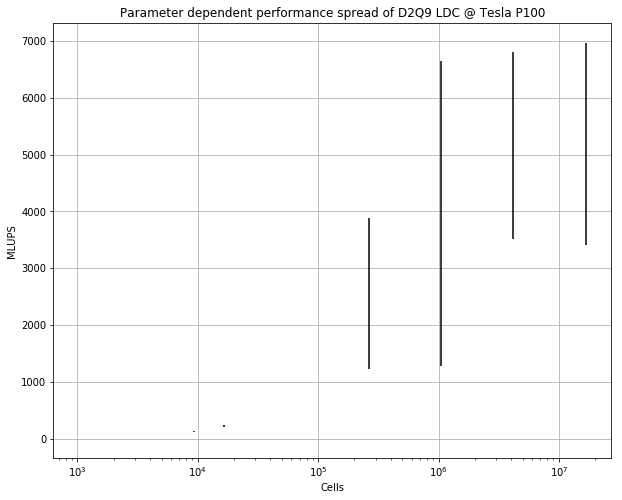

In [24]:
sizes = [32,64,96,128,512,1024,2048,4096]
lines = spreads(ldc_2d_p100, sizes)
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Parameter dependent performance spread of D2Q9 LDC @ Tesla P100')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
plt.vlines(list(map(lambda x: x**2, sizes)), ymin=list(zip(*lines))[0], ymax=list(zip(*lines))[1])

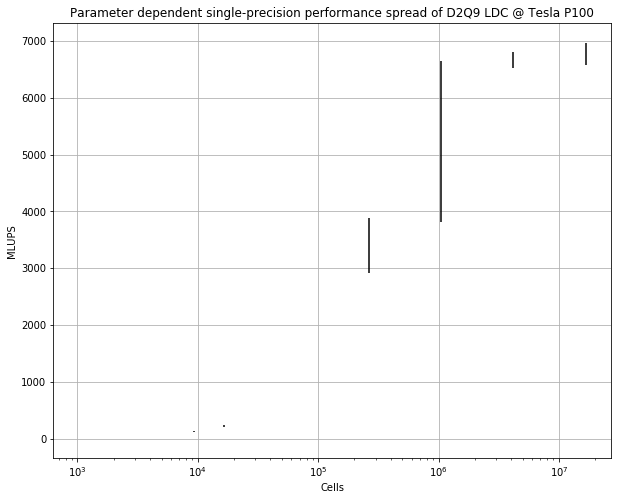

In [25]:
sizes = [32,64,96,128,512,1024,2048,4096]
lines = spreads(ldc_2d_p100, sizes, precision=['single'])
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Parameter dependent single-precision performance spread of D2Q9 LDC @ Tesla P100')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
plt.vlines(list(map(lambda x: x**2, sizes)), ymin=list(zip(*lines))[0], ymax=list(zip(*lines))[1])

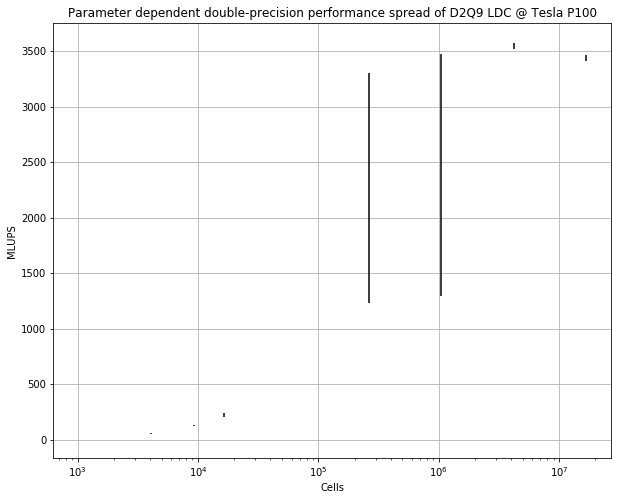

In [26]:
sizes = [32,64,96,128,512,1024,2048,4096]
lines = spreads(ldc_2d_p100, sizes, precision=['double'])
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Parameter dependent double-precision performance spread of D2Q9 LDC @ Tesla P100')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
plt.vlines(list(map(lambda x: x**2, sizes)), ymin=list(zip(*lines))[0], ymax=list(zip(*lines))[1])

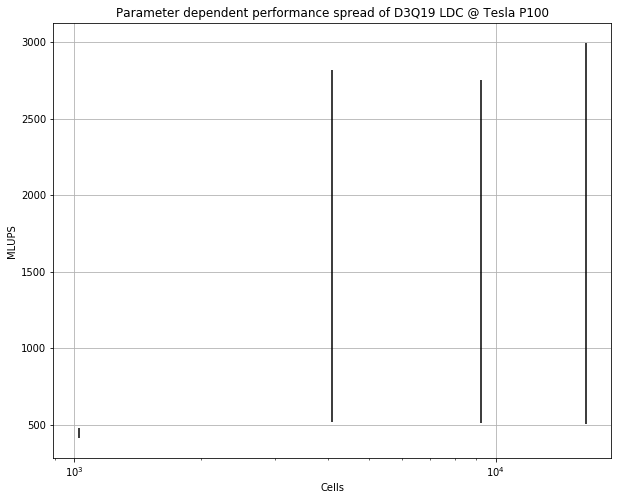

In [27]:
sizes = [32,64,96,128]
lines = spreads(ldc_3d_D3Q19_p100, sizes)
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Parameter dependent performance spread of D3Q19 LDC @ Tesla P100')
plt.xscale('log')
plt.xlabel('Cells')
plt.ylabel('MLUPS')
plt.vlines(list(map(lambda x: x**2, sizes)), ymin=list(zip(*lines))[0], ymax=list(zip(*lines))[1])